**Cài đặt thư viện** 

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Xác nhận và tạo PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth) 

**Tạo thư viện**

In [ ]:
# Thư viện đọc dataset
import pandas as pd

#2.1 Thư viện vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

#Thư viện xử lý các phép toán trong mô hình
import numpy as np

**Đọc file dataset đã được xử lý trên Excel**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('dataset_edited_by_excel.csv')
#Xác định tên header trong dataset
header1 =['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']
data = data.reindex(columns=header1)
data.head

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<bound method NDFrame.head of        Administrative  Administrative_Duration  ...  Weekend  Revenue
0                   0                      0.0  ...        0        0
1                   0                      0.0  ...        0        0
2                   0                      0.0  ...        0        0
3                   0                      0.0  ...        0        0
4                   0                      0.0  ...        1        0
...               ...                      ...  ...      ...      ...
12325               3                    145.0  ...        1        0
12326               0                      0.0  ...        1        0
12327               0                      0.0  ...        1        0
12328               4                     75.0  ...        0        0
12329               0                      0.0  ...        1        0

[12330 rows x 18 columns]>

**Kiểm tra Null Value**

In [ ]:
data.isnull().values.any() # Returns False là data không có

False

**Kiểm tra số lượng class tại output cột Revenue**

In [ ]:
# Check ratio between 2 classes
st = round((data['Revenue'].value_counts()[1] / len (data)) * 100, 2)
nt = round((data['Revenue'].value_counts()[0] / len(data)) * 100, 2)

print ('Số giao dịch thành công (1): ', st,'(%)')
print ('Không xảy ra giao dịch (0): ', nt,'(%)')

Số giao dịch thành công (1):  15.47 (%)
Không xảy ra giao dịch (0):  84.53 (%)


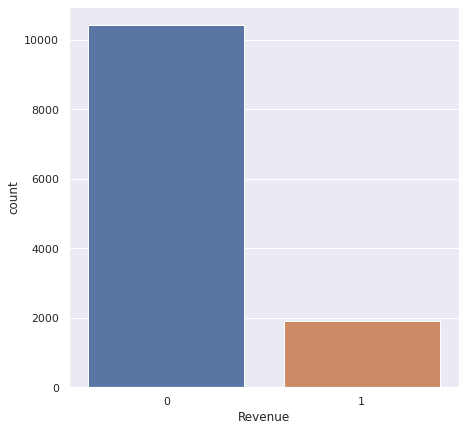

In [ ]:
plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
sns.countplot(x="Revenue", data= data)

**Visuallize dataset và thống kê mô tả**

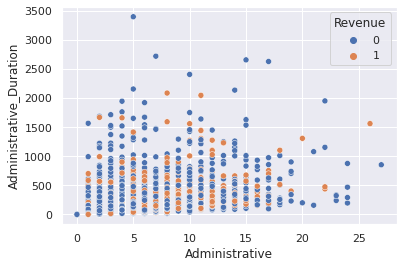

In [ ]:
#plt.style.use('seaborn-white')
plt.subplot(111)
sns.scatterplot(x="Administrative", y="Administrative_Duration",hue="Revenue", data=data)


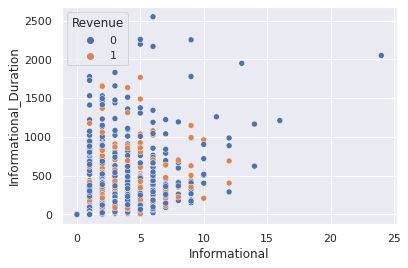

In [ ]:
plt.subplot(111)
sns.scatterplot(x="Informational", y="Informational_Duration",hue="Revenue", data=data)


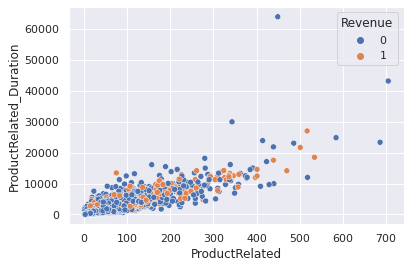

In [ ]:
plt.subplot(111)
sns.scatterplot(x="ProductRelated", y="ProductRelated_Duration",hue="Revenue", data=data)


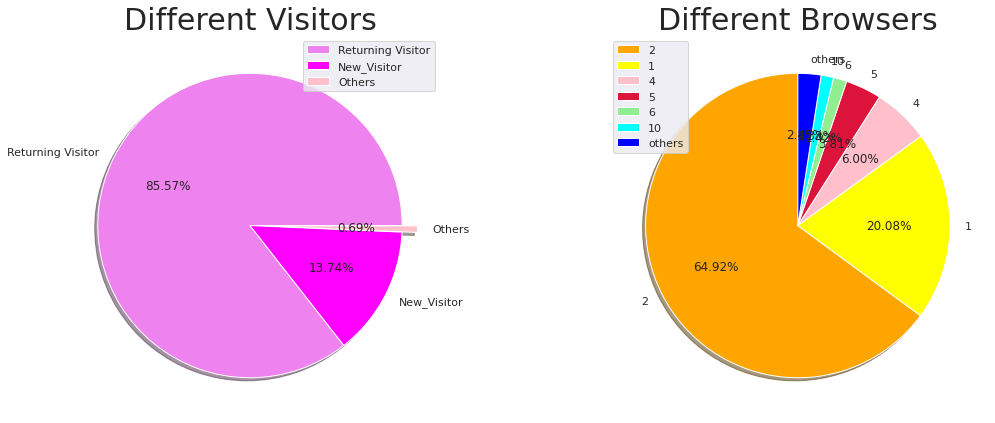

In [ ]:
data['VisitorType'].value_counts()
# plotting a pie chart for browsers

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()


**Xử lý các feature dạng số sử dụng Robust Scaler**

In [ ]:
#Loading thư viện RobustScaler từ Scikit learn
from sklearn.preprocessing import RobustScaler

#load mô hình RobustScaler
rob_scaler = RobustScaler()

data['scaled_Administrative'] = rob_scaler.fit_transform(data['Administrative'].values.reshape(-1,1))

data['scaled_Administrative_Duration'] = rob_scaler.fit_transform(data['Administrative_Duration'].values.reshape(-1,1))

data['scaled_Informational'] = rob_scaler.fit_transform(data['Informational'].values.reshape(-1,1))

data['scaled_Informational_Duration'] = rob_scaler.fit_transform(data['Informational_Duration'].values.reshape(-1,1))

data['scaled_ProductRelated'] = rob_scaler.fit_transform(data['ProductRelated'].values.reshape(-1,1))

data['scaled_ProductRelated_Duration'] = rob_scaler.fit_transform(data['ProductRelated_Duration'].values.reshape(-1,1))

data['scaled_BounceRates'] = rob_scaler.fit_transform(data['BounceRates'].values.reshape(-1,1))

data['scaled_ExitRates'] = rob_scaler.fit_transform(data['ExitRates'].values.reshape(-1,1))

data['scaled_PageValues'] = rob_scaler.fit_transform(data['PageValues'].values.reshape(-1,1))

data['scaled_SpecialDay'] = rob_scaler.fit_transform(data['SpecialDay'].values.reshape(-1,1))


**Visualize một số kết quả nổi bật sau khi xử lý dữ liệu bằng Robust Scaler**


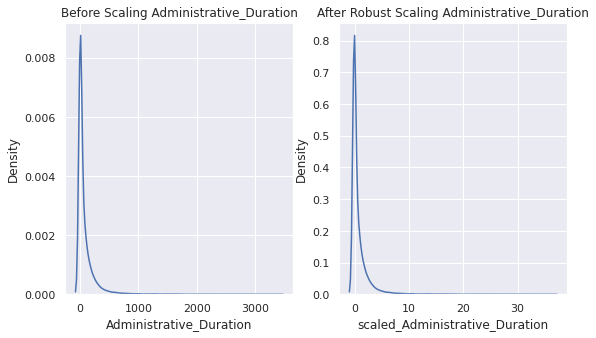

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 5))
ax1.set_title('Before Scaling Administrative_Duration')
sns.kdeplot(data['Administrative_Duration'], ax=ax1)

ax2.set_title('After Robust Scaling Administrative_Duration')
sns.kdeplot(data['scaled_Administrative_Duration'], ax=ax2)


**Tiền xử lý các feature dạng phân loại theo OneHotEncoding**


In [ ]:
#Load thư viện OneHotEncoding từ scikit-learn
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

#Danh sách các thuộc tính cần xử lý
categorical_cols = ['OperatingSystems', 'Browser', 'Month','Region','TrafficType','VisitorType','Weekend']

#đưa dữ liệu các thuộc tính cần xử lý vào one hotencoder
transformed_data = onehotencoder.fit_transform(data[categorical_cols])

#tạo một biến tạm để lưu dữ liệu mã hóa
encoded_data = pd.DataFrame(transformed_data, index=data.index)

# bây giờ ta gộp dữ liệu mã hóa vào biến tạm
concatenated_data = pd.concat([data, encoded_data], axis=1)


In [ ]:
#Chuyển dữ liệu vào data gốc
data['scaled_OperatingSystems'] = concatenated_data['OperatingSystems']
data['scaled_Browser'] = concatenated_data['Browser']
data['scaled_Month'] = concatenated_data['Month']
data['scaled_Region'] = concatenated_data['Region']
data['scaled_TrafficType'] = concatenated_data['TrafficType']
data['scaled_VisitorType'] = concatenated_data['VisitorType']
data['scaled_Weekend'] = concatenated_data['Weekend']


In [ ]:
#Loại bỏ nhưng cột chưa được làm sạch
data.drop(['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems', 'Browser', 'Month','Region','TrafficType','VisitorType','Weekend'], axis=1, inplace=True)

# xuất kết quả sau khi đã chuẩn hóa ra màn hình
data.head()


,Revenue,scaled_Administrative,scaled_Administrative_Duration,scaled_Informational,scaled_Informational_Duration,scaled_ProductRelated,scaled_ProductRelated_Duration,scaled_BounceRates,scaled_ExitRates,scaled_PageValues,scaled_SpecialDay,scaled_OperatingSystems,scaled_Browser,scaled_Month,scaled_Region,scaled_TrafficType,scaled_VisitorType,scaled_Weekend
0,0,-0.25,-0.080424,0.0,0.0,-0.548387,-0.467912,11.720238,4.896359,0.0,0.0,1,1,2,1,1,3,0
1,0,-0.25,-0.080424,0.0,0.0,-0.516129,-0.417913,-0.184524,2.095238,0.0,0.0,2,2,2,1,2,3,0
2,0,-0.25,-0.080424,0.0,0.0,-0.548387,-0.467912,11.720238,4.896359,0.0,0.0,4,1,2,9,3,3,0
3,0,-0.25,-0.080424,0.0,0.0,-0.516129,-0.465829,2.791667,3.215686,0.0,0.0,3,2,2,2,4,3,0
4,0,-0.25,-0.080424,0.0,0.0,-0.258065,0.022315,1.005952,0.694678,0.0,0.0,3,3,2,1,4,3,1


In [ ]:
#14 Chia tập dataset ra làm 2 phần X = là tất cả các biến độc lập (trừ output) Y = output Revenue
y = data.Revenue
X = data.drop('Revenue', axis=1)


In [ ]:
!unzip mRMR.zip

Archive:  mRMR.zip
replace mRMR/mrmr.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: mRMR/mrmr.py            
  inflating: mRMR/utils/information_metrics.py  
 extracting: mRMR/utils/__init__.py  
  inflating: mRMR/utils/__pycache__/information_metrics.cpython-37.pyc  
  inflating: mRMR/utils/__pycache__/__init__.cpython-37.pyc  


In [ ]:
import unittest
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from mRMR.mrmr import MRMR

In [ ]:
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_discr = discretizer.fit_transform(X)

In [ ]:
features = X.columns
mrmr = MRMR(n_features=6)
selected_indices = mrmr.fit(X_discr, y.to_list())
selected_feature_names = features[selected_indices]

print('Các feature được thứ tự giảm dần (top 6)', selected_feature_names.to_list())


Các feature được thứ tự giảm dần (top 6) ['scaled_ExitRates', 'scaled_BounceRates', 'scaled_Month', 'scaled_VisitorType', 'scaled_PageValues', 'scaled_SpecialDay']


In [ ]:
#Loại bỏ các cột khác ngoại trừ 6 cột đã lọc được từ bước trên
X.drop(X.columns.difference(selected_feature_names), 1, inplace=True)
X.head()


,scaled_BounceRates,scaled_ExitRates,scaled_PageValues,scaled_SpecialDay,scaled_Month,scaled_VisitorType
0,11.720238,4.896359,0.0,0.0,2,3
1,-0.184524,2.095238,0.0,0.0,2,3
2,11.720238,4.896359,0.0,0.0,2,3
3,2.791667,3.215686,0.0,0.0,2,3
4,1.005952,0.694678,0.0,0.0,2,3


**Chia 30% tập test và 70% for make a train sheet**

In [ ]:
#load thư viện chia data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)



X_train:

       scaled_BounceRates  scaled_ExitRates  ...  scaled_Month  scaled_VisitorType
4361             0.345238         -0.047619  ...             5                   3
6250            -0.184524          0.414566  ...            10                   3
11133           -0.184524         -0.428571  ...            11                   3
2765             1.077381         -0.201681  ...             5                   3
9047             0.898810         -0.196078  ...            11                   2

[5 rows x 6 columns]
(8631, 6)

X_test:

      scaled_BounceRates  scaled_ExitRates  ...  scaled_Month  scaled_VisitorType
2378            1.470238         -0.011204  ...             5                   3
8771           -0.184524          1.162465  ...            11                   3
5223            0.494048          0.445378  ...             5                   3
2202           -0.184524         -0.509804  ...             5                   3
8711           -0.184524          0.156

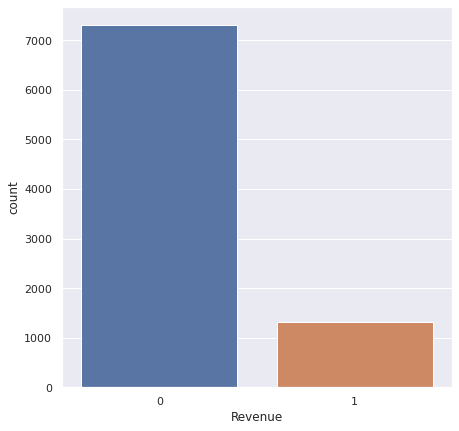

In [ ]:
training_data = pd.concat([X_train,y_train],axis = 1)
training_data['Revenue'].value_counts()
#21 vẽ mô hình 
plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
sns.countplot(x="Revenue", data= training_data)


Đây là kết quả thu được tương ứng vs output 0,1 của tập train ta nhận thấy chúng đã bị mất cân bằng Bước kế tiếp ta tiến hành Over-sampling cho dữ liệu mất cân bằng trên


Phần trăm các phiên giao dịch tốt:  0.5
Phần trăm các phiên giao dịch xấu:  0.5
Total number of transactions in resampled data:  14614


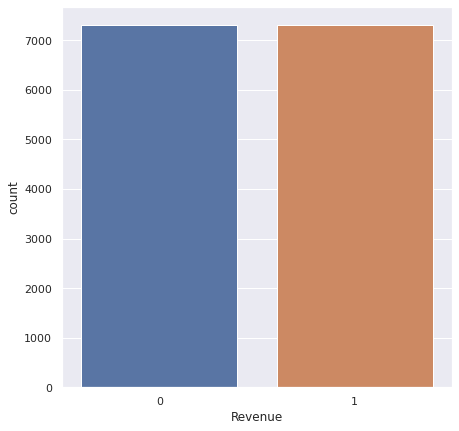

In [ ]:
# Giao dịch Thành công /thất bại
Good = training_data[training_data['Revenue'] == 1]
bad = training_data[training_data['Revenue'] == 0]

# Số lương giao dịch Thành công và ngược lại
number_records_fraud = len(Good)
number_records_non_fraud = len (bad)

over_sample_fraud = Good.sample (number_records_non_fraud, replace = True) 
over_sample_data = pd.concat ([over_sample_fraud, bad], axis = 0)

# xuất tỉ số 
print("Phần trăm các phiên giao dịch tốt: ", len(over_sample_data[over_sample_data.Revenue == 0])/len(over_sample_data))
print("Phần trăm các phiên giao dịch xấu: ", len(over_sample_data[over_sample_data.Revenue == 1])/len(over_sample_data))
print("Total number of transactions in resampled data: ", len(over_sample_data))

# Assigning X, y for over-sampled dataset
X_train_oversample = over_sample_data.drop ('Revenue', axis = 1)
y_train_oversample = over_sample_data['Revenue']

# Plot countplot
plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
sns.countplot(x="Revenue", data=over_sample_data)


**CHẠY MÔ HÌNH**

**MLP-Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
mlp_model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10), random_state=1,verbose=1)


In [ ]:
#Huấn luyện mô hình
mlp_model.fit(X_train_oversample, y_train_oversample)
#Dự đoán kết quả với mô hình mlp
y_pred1 = mlp_model.predict(X_test)

Iteration 1, loss = 1.54285098
Iteration 2, loss = 0.76943174
Iteration 3, loss = 0.54844801
Iteration 4, loss = 0.49405683
Iteration 5, loss = 0.47423143
Iteration 6, loss = 0.46113363
Iteration 7, loss = 0.45031748
Iteration 8, loss = 0.44142594
Iteration 9, loss = 0.43481860
Iteration 10, loss = 0.42456470
Iteration 11, loss = 0.41225791
Iteration 12, loss = 0.40506978
Iteration 13, loss = 0.40040258
Iteration 14, loss = 0.39717319
Iteration 15, loss = 0.39388537
Iteration 16, loss = 0.39167032
Iteration 17, loss = 0.38963916
Iteration 18, loss = 0.38774619
Iteration 19, loss = 0.38610861
Iteration 20, loss = 0.38474332
Iteration 21, loss = 0.38439625
Iteration 22, loss = 0.38298258
Iteration 23, loss = 0.38222108
Iteration 24, loss = 0.38132371
Iteration 25, loss = 0.38040131
Iteration 26, loss = 0.38045787
Iteration 27, loss = 0.37933268
Iteration 28, loss = 0.37923482
Iteration 29, loss = 0.37858658
Iteration 30, loss = 0.37806798
Iteration 31, loss = 0.37783498
Iteration 32, los

In [ ]:
# confusion matrix to precision + recall
def cm2pr_binary(cm):
    p = cm[0,0]/np.sum(cm[:,0])
    r = cm[0,0]/np.sum(cm[0])
    return (p, r)

In [ ]:
print('Độ chính xác là: ',accuracy_score(y_test, y_pred1))
cm = confusion_matrix(y_test, y_pred1)
tp, fp, fn, tn = cm.ravel()
print('Số lượng các giao dịch thành công được dự đoán (True positive):',tp)
print('Số lượng các giao dịch thất bại bị phân loại nhầm là thành công',fp)
print('Số lượng các giao dịch thất bại được dự đoán đúng',tn)
print('Số lượng các giao dịch thành công bị phân loại nhầm là thất bại',fn)
print("True Positive rate = {0:.3f}".format(tp/(tp+fn)))
print("True Negative rate = {0:.3f}".format(tn/(tn+fp)))
p,r = cm2pr_binary(cm)
print("Giá trị precision = {0:.3f} ".format(p))
print("Giá trị recall = {0:.3f}".format(r))
F1 = 2 * (p * r) / (p + r)
print("Giá trị F1 Score = {0:.2f}".format(p, r))

Độ chính xác là:  0.8772641254393079
Số lượng các giao dịch thành công được dự đoán (True positive): 2773
Số lượng các giao dịch thất bại bị phân loại nhầm là thành công 342
Số lượng các giao dịch thất bại được dự đoán đúng 472
Số lượng các giao dịch thành công bị phân loại nhầm là thất bại 112
True Positive rate = 0.961
True Negative rate = 0.580
Giá trị precision = 0.961 
Giá trị recall = 0.890
Giá trị F1 Score = 0.96


**Thuật toán cây quyết định dựa trên C4.5**



In [ ]:
!unzip c45.zip

Archive:  c45.zip
replace c45/c45.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: c45/c45.py              
  inflating: c45/c45_utils.py        
 extracting: c45/__init__.py         


Sử dụng mã Nguồn mở :https://github.com/RaczeQ/scikit-learn-C4.5-tree-classifier/blob/master/c45/c45_utils.py

In [2]:
#loading thư viện C4.5
from c45_tree_classifier import C45
c45_model = C45(attrNames=X.columns)
#Huấn luyện mô hình
c45_model.fit(X_train_oversample, y_train_oversample)
#Dự đoán mô hình
y_pred2 = c45_model.predict(X_test)

NameError: name 'X' is not defined

Đánh giá mô hình C4.5

In [ ]:
print('Độ chính xác là: ',accuracy_score(y_test, y_pred2))
cm2 = confusion_matrix(y_test, y_pred2)
tp, fp, fn, tn = cm2.ravel()
print('Số lượng các giao dịch thành công được dự đoán (True positive):',tp)
print('Số lượng các giao dịch thất bại bị phân loại nhầm là thành công',fp)
print('Số lượng các giao dịch thất bại được dự đoán đúng',tn)
print('Số lượng các giao dịch thành công bị phân loại nhầm là thất bại',fn)
print("True Positive rate = {0:.3f}".format(tp/(tp+fn)))
print("True Negative rate = {0:.3f}".format(tn/(tn+fp)))
p,r = cm2pr_binary(cm2)
print("Giá trị precision = {0:.3f} ".format(p))
print("Giá trị recall = {0:.3f}".format(r))
F1 = 2 * (p * r) / (p + r)
print("Giá trị F1 Score = {0:.2f}".format(p, r))


Độ chính xác là:  0.8475263584752636
Số lượng các giao dịch thành công được dự đoán (True positive): 2797
Số lượng các giao dịch thất bại bị phân loại nhầm là thành công 318
Số lượng các giao dịch thất bại được dự đoán đúng 338
Số lượng các giao dịch thành công bị phân loại nhầm là thất bại 246
True Positive rate = 0.919
True Negative rate = 0.515
Giá trị precision = 0.919 
Giá trị recall = 0.898
Giá trị F1 Score = 0.92


# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ramdomforest_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
#Huấn luyện mô hình Randomforest 
ramdomforest_model.fit(X_train_oversample, y_train_oversample)
#Dự đoán kết quả sử dụng mô hình randomforest
y_pred3 = ramdomforest_model.predict(X_test)

Đánh giá mô hình Ramdom forest

In [ ]:
print('Độ chính xác là: ',accuracy_score(y_test, y_pred3))
cm3 = confusion_matrix(y_test, y_pred3)
tp, fp, fn, tn = cm3.ravel()
print('Số lượng các giao dịch thành công được dự đoán (True positive):',tp)
print('Số lượng các giao dịch thất bại bị phân loại nhầm là thành công',fp)
print('Số lượng các giao dịch thất bại được dự đoán đúng',tn)
print('Số lượng các giao dịch thành công bị phân loại nhầm là thất bại',fn)
print("True Positive rate = {0:.3f}".format(tp/(tp+fn)))
print("True Negative rate = {0:.3f}".format(tn/(tn+fp)))
p,r = cm2pr_binary(cm3)
print("Giá trị precision = {0:.3f} ".format(p))
print("Giá trị recall = {0:.3f}".format(r))
F1 = 2 * (p * r) / (p + r)
print("Giá trị F1 Score = {0:.2f}".format(p, r))


Độ chính xác là:  0.8675317653419843
Số lượng các giao dịch thành công được dự đoán (True positive): 2795
Số lượng các giao dịch thất bại bị phân loại nhầm là thành công 320
Số lượng các giao dịch thất bại được dự đoán đúng 414
Số lượng các giao dịch thành công bị phân loại nhầm là thất bại 170
True Positive rate = 0.943
True Negative rate = 0.564
Giá trị precision = 0.943 
Giá trị recall = 0.897
Giá trị F1 Score = 0.94


**SVM sử dụng linear**

In [ ]:
from sklearn.svm import SVC
#Tạo mô hình SVM sử dụng kernel là linear
svm_linear_model = SVC(kernel='linear', C=1, random_state=0)
#Huấn luyện mô hình
svm_linear_model.fit(X_train_oversample, y_train_oversample)
#Dự đoán kết quả trên tập test với mô hình SVM linear 
y_pred4 = svm_linear_model.predict(X_test)

Đánh giá mô hình SVM linear

In [ ]:
print('Độ chính xác là: ',accuracy_score(y_test, y_pred4))
cm4 = confusion_matrix(y_test, y_pred4)
tp, fp, fn, tn = cm4.ravel()
print('Số lượng các giao dịch thành công được dự đoán (True positive):',tp)
print('Số lượng các giao dịch thất bại bị phân loại nhầm là thành công',fp)
print('Số lượng các giao dịch thất bại được dự đoán đúng',tn)
print('Số lượng các giao dịch thành công bị phân loại nhầm là thất bại',fn)
print("True Positive rate = {0:.3f}".format(tp/(tp+fn)))
print("True Negative rate = {0:.3f}".format(tn/(tn+fp)))
p,r = cm2pr_binary(cm4)
print("Giá trị precision = {0:.3f} ".format(p))
print("Giá trị recall = {0:.3f}".format(r))
F1 = 2 * (p * r) / (p + r)
print("Giá trị F1 Score = {0:.2f}".format(p, r))


Độ chính xác là:  0.8856447688564477
Số lượng các giao dịch thành công được dự đoán (True positive): 2877
Số lượng các giao dịch thất bại bị phân loại nhầm là thành công 238
Số lượng các giao dịch thất bại được dự đoán đúng 399
Số lượng các giao dịch thành công bị phân loại nhầm là thất bại 185
True Positive rate = 0.940
True Negative rate = 0.626
Giá trị precision = 0.940 
Giá trị recall = 0.924
Giá trị F1 Score = 0.94


**SVM sử dụng RBF**

In [ ]:
from sklearn.svm import SVC
#Tạo mô hình SVM sử dụng kernel là RBF
svm_rbf_model = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
svm_rbf_model.fit(X_train_oversample, y_train_oversample)
#Dự đoán kết quả trên tập test với mô hình SVM RBF 
y_pred5 = svm_rbf_model.predict(X_test)

Đánh giá mô hình SVM RBF

In [ ]:
print('Độ chính xác là: ',accuracy_score(y_test, y_pred5))
cm5 = confusion_matrix(y_test, y_pred5)
tp, fp, fn, tn = cm5.ravel()
print('Số lượng các giao dịch thành công được dự đoán (True positive):',tp)
print('Số lượng các giao dịch thất bại bị phân loại nhầm là thành công',fp)
print('Số lượng các giao dịch thất bại được dự đoán đúng',tn)
print('Số lượng các giao dịch thành công bị phân loại nhầm là thất bại',fn)
print("True Positive rate = {0:.3f}".format(tp/(tp+fn)))
print("True Negative rate = {0:.3f}".format(tn/(tn+fp)))
p,r = cm2pr_binary(cm5)
print("Giá trị precision = {0:.3f} ".format(p))
print("Giá trị recall = {0:.3f}".format(r))
F1 = 2 * (p * r) / (p + r)
print("Giá trị F1 Score = {0:.2f}".format(p, r))

Độ chính xác là:  0.8775344687753447
Số lượng các giao dịch thành công được dự đoán (True positive): 2777
Số lượng các giao dịch thất bại bị phân loại nhầm là thành công 338
Số lượng các giao dịch thất bại được dự đoán đúng 469
Số lượng các giao dịch thành công bị phân loại nhầm là thất bại 115
True Positive rate = 0.960
True Negative rate = 0.581
Giá trị precision = 0.960 
Giá trị recall = 0.891
Giá trị F1 Score = 0.96


**TEST THỰC TẾ**

In [ ]:
test_row= X_test.iloc[1345]
test_row


In [ ]:
preds = mlp_model.predict(np.array([X_test.iloc[1345]]))[0]

In [ ]:
print("kết quả thực tế",y_test.iloc[1345])
print("kết quả dự đoán",preds)
